In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read train and test data
master_train = pd.read_csv('train.csv')
master_test = pd.read_csv('test.csv')
master_train.head()

,label,feature
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
# define training data dimension
m = master_train.shape[0]
n_w = 48
n_h = 48
n_c = 1

In [4]:
# store training data in arrays of correct dimensions
X = np.zeros((m, n_w, n_h, n_c), dtype=int)
y = np.zeros((m), dtype=int)
for i in range(m):
    X[i] = np.fromstring(master_train['feature'][i], dtype=int, sep=' ').reshape(n_w, n_h, n_c)
    y[i] = int(master_train['label'][i])
    
 # store testing data in arrays of correct dimensions   
X_test = np.zeros((master_test.shape[0], n_w, n_h, n_c), dtype = int)
for i in range(master_test.shape[0]):
    X_test[i] = np.fromstring(master_test['feature'][i], dtype=int, sep=' ').reshape(n_w, n_h, n_c)

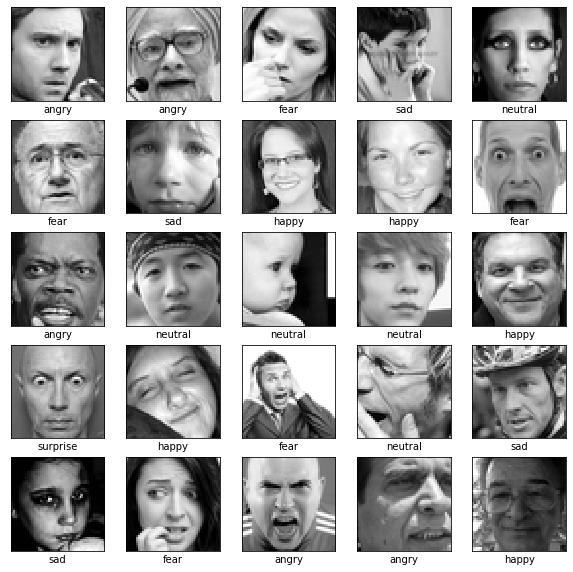

In [5]:
# create a list of sentiment labels
sentiment_label = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
# plot and label first 25 images
plt.figure(figsize= (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].squeeze(), cmap=plt.cm.gray)
    plt.xlabel(sentiment_label[y[i]])
plt.show()

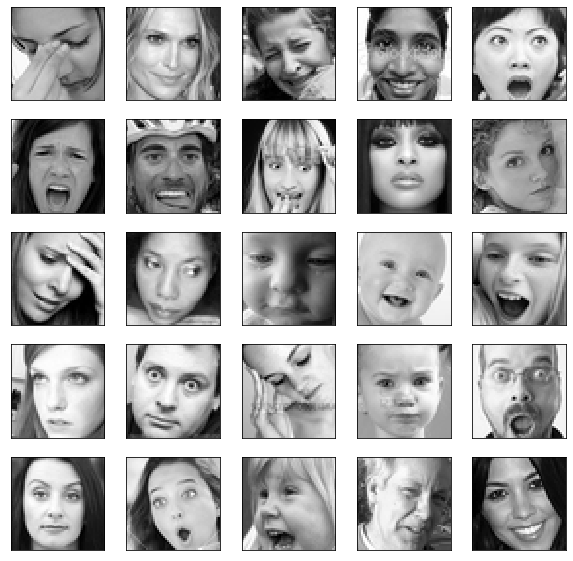

In [54]:
plt.figure(figsize= (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].squeeze(), cmap=plt.cm.gray)
#     plt.xlabel(sentiment_label[y[i]])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = X/255.0
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75, random_state=728)

In [8]:
from keras import layers
from keras import losses
from keras import activations

from keras.regularizers import l2
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

Using TensorFlow backend.


In [34]:
def bl_model(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X_input)   
    X = BatchNormalization(name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool0')(X)
    
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool1')(X)
    
    X = Conv2D(128, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool2')(X)
    
    X = Flatten()(X)
    X = Dense(64, name = 'fc0')(X)
    X = BatchNormalization(name = 'bn3')(X)
    X = Activation('relu')(X)
    X = Dense(7, activation = 'softmax', name = 'fc1')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'Baseline_Model')
    
    return model

In [35]:
baseline_model = bl_model((48, 48, 1))
baseline_model.summary()

Model: "Baseline_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 48, 48, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 46, 46, 32)        320       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 46, 46, 32)        128       
_________________________________________________________________
activation_42 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 23, 23, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 21, 21, 64)        18496     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 21, 21, 64)     

In [36]:
baseline_model.compile(optimizer= 'adam', loss = losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
history_bl = baseline_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Train on 14999 samples, validate on 5000 samples
Epoch 1/10
14999/14999 [==============================] - 54s 4ms/step - loss: 1.5677 - accuracy: 0.3980 - val_loss: 1.5399 - val_accuracy: 0.3850
Epoch 2/10
14999/14999 [==============================] - 51s 3ms/step - loss: 1.2909 - accuracy: 0.5070 - val_loss: 1.6135 - val_accuracy: 0.3776
Epoch 3/10
14999/14999 [==============================] - 57s 4ms/step - loss: 1.1478 - accuracy: 0.5708 - val_loss: 1.7355 - val_accuracy: 0.3148
Epoch 4/10
14999/14999 [==============================] - 52s 3ms/step - loss: 1.0060 - accuracy: 0.6262 - val_loss: 1.3586 - val_accuracy: 0.4870
Epoch 5/10
14999/14999 [==============================] - 49s 3ms/step - loss: 0.8795 - accuracy: 0.6785 - val_loss: 1.6539 - val_accuracy: 0.4314
Epoch 6/10
14999/14999 [==============================] - 48s 3ms/step - loss: 0.7264 - accuracy: 0.7419 - val_loss: 1.4010 - val_accuracy: 0.5022
Epoch 7/10
14999/14999 [==============================] - 48s 3ms/ste

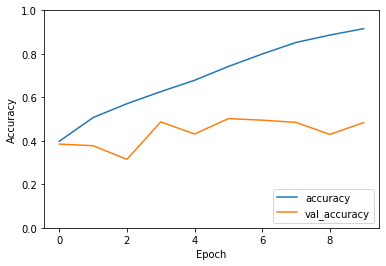

In [37]:
plt.plot(history_bl.history['accuracy'], label='accuracy')
plt.plot(history_bl.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [91]:
def CNN_model(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(32, (3, 3), strides = (1, 1),  kernel_regularizer=l2(0.005), name = 'conv0')(X_input)   
    X = BatchNormalization(name = 'bn0')(X)
#     X = layers.LeakyReLU(alpha = 0.01)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool0')(X)
    
    X = Conv2D(64, (3, 3), strides = (1, 1), kernel_regularizer=l2(0.005), name = 'conv1')(X)
    X = BatchNormalization(name = 'bn1')(X)
#     X = layers.LeakyReLU(alpha = 0.01)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool1')(X)
    
    X = Conv2D(128, (3, 3), strides = (1, 1), kernel_regularizer=l2(0.001), name = 'conv2')(X)
    X = BatchNormalization(name = 'bn2')(X)
#     X = layers.LeakyReLU(alpha = 0.01)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool2')(X)
    
    X = Flatten()(X)
    X = Dense(64, kernel_regularizer=l2(0.001), name = 'fc0')(X)
    X = BatchNormalization(name = 'bn3')(X)
    X = Activation('relu')(X)
    X = Dense(7, activation = 'softmax', name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'CNN')
    
    return model

In [92]:
CNN = CNN_model((48, 48, 1))

In [93]:
CNN.compile(optimizer= 'adam', loss = losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
history_CNN = CNN.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Train on 14999 samples, validate on 5000 samples
Epoch 1/20
14999/14999 [==============================] - 64s 4ms/step - loss: 1.9241 - accuracy: 0.3987 - val_loss: 1.9654 - val_accuracy: 0.3254
Epoch 2/20
14999/14999 [==============================] - 60s 4ms/step - loss: 1.5765 - accuracy: 0.5034 - val_loss: 1.8150 - val_accuracy: 0.4004
Epoch 3/20
14999/14999 [==============================] - 61s 4ms/step - loss: 1.4362 - accuracy: 0.5524 - val_loss: 1.5744 - val_accuracy: 0.4962
Epoch 4/20
14999/14999 [==============================] - 57s 4ms/step - loss: 1.3619 - accuracy: 0.5792 - val_loss: 1.8843 - val_accuracy: 0.3904
Epoch 5/20
14999/14999 [==============================] - 61s 4ms/step - loss: 1.2980 - accuracy: 0.6147 - val_loss: 1.6476 - val_accuracy: 0.4670
Epoch 6/20
14999/14999 [==============================] - 59s 4ms/step - loss: 1.2375 - accuracy: 0.6463 - val_loss: 1.6927 - val_accuracy: 0.4572
Epoch 7/20
14999/14999 [==============================] - 59s 4ms/ste

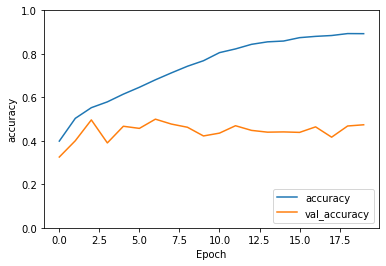

In [94]:
plt.plot(history_CNN.history['accuracy'], label='accuracy')
plt.plot(history_CNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [109]:
def CNN2_model(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X_input)   
    X = BatchNormalization(name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool0')(X)
    X = Dropout(0.1)(X)
    
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool1')(X)
    X = Dropout(0.1)(X)
    
    X = Conv2D(128, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool2')(X)
    X = Dropout(0.1)(X)
    
    X = Flatten()(X)
    
    X = Dense(64, name = 'fc0')(X)
    X = BatchNormalization(name = 'bn3')(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)
    X = Dense(7, activation = 'softmax', name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'CNN')
    
    return model

In [110]:
CNN2 = CNN2_model((48, 48, 1))
CNN2.compile(optimizer= 'adam', loss = losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
history_CNN2 = CNN2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Train on 14999 samples, validate on 5000 samples
Epoch 1/10
14999/14999 [==============================] - 66s 4ms/step - loss: 1.6261 - accuracy: 0.3666 - val_loss: 1.6913 - val_accuracy: 0.3268
Epoch 2/10
14999/14999 [==============================] - 50s 3ms/step - loss: 1.3900 - accuracy: 0.4714 - val_loss: 1.4263 - val_accuracy: 0.4538
Epoch 3/10
14999/14999 [==============================] - 49s 3ms/step - loss: 1.2823 - accuracy: 0.5058 - val_loss: 1.2852 - val_accuracy: 0.5052
Epoch 4/10
14999/14999 [==============================] - 49s 3ms/step - loss: 1.2130 - accuracy: 0.5448 - val_loss: 1.2672 - val_accuracy: 0.5118
Epoch 5/10
14999/14999 [==============================] - 50s 3ms/step - loss: 1.1486 - accuracy: 0.5674 - val_loss: 1.2843 - val_accuracy: 0.5098
Epoch 6/10
14999/14999 [==============================] - 48s 3ms/step - loss: 1.0833 - accuracy: 0.5954 - val_loss: 1.2061 - val_accuracy: 0.5470
Epoch 7/10
14999/14999 [==============================] - 49s 3ms/ste

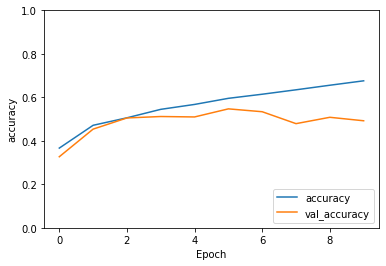

In [112]:
plt.plot(history_CNN2.history['accuracy'], label='accuracy')
plt.plot(history_CNN2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [9]:
def CNN3_model(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(32, (3, 3), padding = 'same', name = 'conv0')(X_input)   
    X = Activation('relu')(X)
    X = Conv2D(32, (3, 3), name = 'conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool0')(X)
    X = Dropout(0.5)(X)
    
    X = Conv2D(64, (3, 3), name = 'conv2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name = 'max_pool1')(X)
    X = Dropout(0.5)(X)
       
    X = Flatten()(X)
    
    X = Dense(64, name = 'fc0')(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(7, activation = 'softmax', name = 'fc1')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'CNN3')
    
    return model

In [10]:
CNN3 = CNN3_model((48, 48, 1))
CNN3.summary()

Model: "CNN3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0      

In [11]:
CNN3.compile(optimizer= 'adam', loss = losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
history_CNN2 = CNN3.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Train on 14999 samples, validate on 5000 samples
Epoch 1/20
14999/14999 [==============================] - 68s 5ms/step - loss: 1.8300 - accuracy: 0.2403 - val_loss: 1.7653 - val_accuracy: 0.2910
Epoch 2/20
14999/14999 [==============================] - 69s 5ms/step - loss: 1.7365 - accuracy: 0.2955 - val_loss: 1.6143 - val_accuracy: 0.3676
Epoch 3/20
14999/14999 [==============================] - 67s 4ms/step - loss: 1.6634 - accuracy: 0.3374 - val_loss: 1.6278 - val_accuracy: 0.3862
Epoch 4/20
14999/14999 [==============================] - 69s 5ms/step - loss: 1.6168 - accuracy: 0.3620 - val_loss: 1.5269 - val_accuracy: 0.4306
Epoch 5/20
14999/14999 [==============================] - 76s 5ms/step - loss: 1.5737 - accuracy: 0.3784 - val_loss: 1.4748 - val_accuracy: 0.4420
Epoch 6/20
14999/14999 [==============================] - 68s 5ms/step - loss: 1.5370 - accuracy: 0.3970 - val_loss: 1.4411 - val_accuracy: 0.4622
Epoch 7/20
14999/14999 [==============================] - 78s 5ms/ste

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
y_predict = np.argmax(CNN3.predict(X_val), axis = 1)
y_predict

array([3, 3, 4, ..., 4, 4, 0])

In [20]:
len(y_predict)

5000

In [23]:
confusion_matrix(y_val, y_predict)

array([[194,   0,  46,  81, 214,  22, 133],
       [ 26,   0,   5,   5,  21,   0,  10],
       [100,   0, 165,  64, 201,  94, 126],
       [ 31,   0,  22, 979, 139,  19,  80],
       [ 64,   0,  48,  91, 427,  14, 182],
       [  9,   0,  36,  37,  23, 374,  39],
       [ 53,   0,  26, 110, 197,  15, 478]])

In [38]:
conf_matrix = confusion_matrix(y_val, y_predict) / confusion_matrix(y_val, y_predict).sum(axis = 1)[:, None]

In [42]:
import seaborn as sns

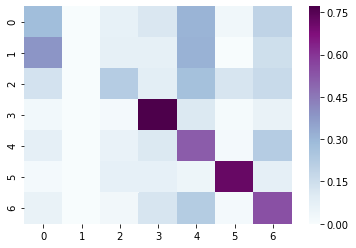

In [53]:
sns.heatmap(conf_matrix, cmap= 'BuPu')